In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/energy-consumption-dataset-by-our-world-in-data/energy-data-master/.gitignore
/kaggle/input/energy-consumption-dataset-by-our-world-in-data/energy-data-master/README.md
/kaggle/input/energy-consumption-dataset-by-our-world-in-data/energy-data-master/owid-energy-data.csv
/kaggle/input/energy-consumption-dataset-by-our-world-in-data/energy-data-master/owid-energy-codebook.csv
/kaggle/input/energy-consumption-dataset-by-our-world-in-data/energy-data-master/scripts/shared.py
/kaggle/input/energy-consumption-dataset-by-our-world-in-data/energy-data-master/scripts/upload_datasets_to_s3.py
/kaggle/input/energy-consumption-dataset-by-our-world-in-data/energy-data-master/scripts/requirements.txt
/kaggle/input/energy-consumption-dataset-by-our-world-in-data/energy-data-master/scripts/make_dataset.py
/kaggle/input/energy-consumption-dataset-by-our-world-in-data/energy-data-master/scripts/tests/test_make_dataset.py
/kaggle/input/global-data-on-sustainable-energy/global Data on Sustai

# Global Sustainable Energy Analysis

This notebook explores global and country-level energy metrics including electricity access, renewable energy adoption, and CO₂ emissions.  
It provides **interactive visualizations** and **forecasting** for key metrics.




## Problem Statement
Access to clean, reliable, and sustainable energy is uneven across the globe. While renewable energy adoption is growing, many countries still rely heavily on fossil fuels, contributing to rising CO₂ emissions and climate risks. This project analyzes global and country-level energy data to uncover trends, highlight gaps, and provide insights into the transition toward cleaner, more sustainable energy.

## Objectives
- **Understand Energy Access:** Identify which countries and regions have reliable electricity and clean cooking fuels.  
- **Track Renewable Energy Adoption:** Analyze trends in renewable energy share and electricity generation over time.  
- **Analyze Emissions and Efficiency:** Explore the relationship between energy consumption, CO₂ emissions, and energy intensity.  
- **Compare Countries and Regions:** Highlight leaders and laggards in the energy transition.  
- **Forecast Future Trends:** Predict key metrics like CO₂ emissions, renewable energy share, and energy consumption to provide actionable insights for policy and planning.

## Scope
- **Dataset:** Global Sustainable Energy dataset uploaded to Kaggle.  
- **Coverage:** Country-level and regional-level data over multiple years.  
- **Analysis:** 
    - Exploratory Data Analysis (EDA) to identify historical trends  
    - Visualization of key energy and emissions metrics  
    - Country and regional comparisons  
    - Forecasting of future trends for selected metrics  
- **Impact:** Provides insights for policymakers, researchers, and energy stakeholders on global progress toward sustainable energy and emissions reduction.

## Expected Outcomes
- Clear understanding of global and regional energy access and renewable adoption.  
- Visualizations comparing fossil vs renewable energy and CO₂ emissions trends.  
- Identification of countries making the fastest progress toward sustainable energy transition.  
- Insights into the relationship between energy consumption, emissions, and economic indicators.  
- Forecasted trends to inform energy planning and sustainability strategies.


## 1. Import Libraries

In [2]:
# -----------------------------
# Step 1: Import Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from ipywidgets import interact, widgets
from prophet import Prophet

# Display settings
pd.set_option('display.max_columns', None)


## 2. Load Dataset

In [3]:
# Load your uploaded dataset
data = pd.read_csv("/kaggle/input/global-data-on-sustainable-energy/global Data on Sustainable Energy.csv")

# Check dataset shape
print("Dataset shape:", data.shape)

# Inspect first 5 rows
data.head()


Dataset shape: (3649, 21)


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


## 3. Inspect Columns and Info

In [4]:
# List all columns
print(data.columns.tolist())


['Entity', 'Year', 'Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita', 'Financial flows to developing countries (US $)', 'Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)', 'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_country', 'Renewables (% equivalent primary energy)', 'gdp_growth', 'gdp_per_capita', 'Density\\n(P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude']


In [5]:

# Basic info
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [6]:

# Check missing values
data.isnull().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

## List Available Countries


In [7]:

# Unique countries / regions
countries = data['Entity'].unique()
print("Total countries/regions:", len(countries))
print(countries[:50])  # Show first 50


Total countries/regions: 176
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bermuda' 'Bhutan' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador']


## Filter a Country or Region

In [8]:
# -----------------------------
# Step 3: Smooth Interactive Charts
# -----------------------------
def plot_energy_metrics(country):
    df_country = data[data['Entity'] == country].sort_values('Year')
    
    metrics = {
        'Access to Electricity (%)': 'Access to electricity (% of population)',
        'Renewable Energy Share (%)': 'Renewable energy share in the total final energy consumption (%)',
        'CO₂ Emissions (kt)': 'Value_co2_emissions_kt_by_country'
    }
    
    colors = ['green', 'orange', 'red']
    plt.figure(figsize=(12,6))
    
    for (label, col), color in zip(metrics.items(), colors):
        df_metric = df_country[['Year', col]].dropna()
        if len(df_metric) < 2:
            continue
        
        x = df_metric['Year'].values
        y = df_metric[col].values
        
        # Smooth curve
        x_smooth = np.linspace(x.min(), x.max(), 300)
        y_smooth = make_interp_spline(x, y, k=3)(x_smooth)
        
        plt.plot(x_smooth, y_smooth, color=color, linewidth=2, label=f'{label} (Smoothed)')
        plt.scatter(x, y, color=color, alpha=0.5)
    
    plt.title(f"{country}: Key Energy Metrics Over Time", fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Values", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# Dropdown for country selection
interact(plot_energy_metrics,
         country=widgets.Dropdown(
             options=sorted(data['Entity'].unique()),
             description='Select Country:',
             value='Nigeria'
         ))



interactive(children=(Dropdown(description='Select Country:', index=117, options=('Afghanistan', 'Albania', 'A…

<function __main__.plot_energy_metrics(country)>

## Forecasting Key Metrics

In [9]:
# -----------------------------
# Step 4: Dynamic Forecasting
# -----------------------------
forecast_metrics = {
    'CO₂ Emissions (kt)': 'Value_co2_emissions_kt_by_country',
    'Access to Electricity (%)': 'Access to electricity (% of population)',
    'Renewable Energy Share (%)': 'Renewable energy share in the total final energy consumption (%)',
    'Fossil Fuel Electricity (TWh)': 'Electricity from fossil fuels (TWh)',
    'Low-Carbon Electricity (%)': 'Low-carbon electricity (% electricity)',
    'Primary Energy Consumption (kWh/person)': 'Primary energy consumption per capita (kWh/person)'
}

def forecast_metric(country, metric, years=10):
    col_name = forecast_metrics[metric]
    
    df_country = data[data['Entity'] == country].sort_values('Year')
    df_country = df_country[['Year', col_name]].dropna()
    
    if len(df_country) < 2:
        print(f"Not enough data to forecast {metric} for {country}.")
        return
    
    df_prophet = df_country.rename(columns={'Year':'ds', col_name:'y'})
    
    model = Prophet(yearly_seasonality=True)
    model.fit(df_prophet)
    
    future = model.make_future_dataframe(periods=years, freq='Y')
    forecast = model.predict(future)
    
    fig1 = model.plot(forecast)
    fig1.suptitle(f"{country}: {metric} Forecast", fontsize=14)
    
    fig2 = model.plot_components(forecast)

# Dropdowns + slider for fully interactive forecasting
interact(forecast_metric,
         country=widgets.Dropdown(
             options=sorted(data['Entity'].unique()),
             description='Select Country:',
             value='Nigeria'
         ),
         metric=widgets.Dropdown(
             options=forecast_metrics.keys(),
             description='Select Metric:',
             value='CO₂ Emissions (kt)'
         ),
         years=widgets.IntSlider(
             value=10, min=1, max=30, step=1,
             description='Forecast Years:'
         )
)


interactive(children=(Dropdown(description='Select Country:', index=117, options=('Afghanistan', 'Albania', 'A…

<function __main__.forecast_metric(country, metric, years=10)>

In [10]:
import plotly.express as px


In [11]:
import numpy as np
from scipy.interpolate import make_interp_spline
from ipywidgets import interact, widgets
import matplotlib.pyplot as plt

def plot_electricity_access_smooth(country):
    # Filter dataset for selected country
    df = data[data['Entity'] == country].sort_values('Year')
    
    x = df['Year'].values
    y = df['Access to electricity (% of population)'].values
    
    # Smooth curve using cubic spline
    x_smooth = np.linspace(x.min(), x.max(), 300)
    spline = make_interp_spline(x, y, k=3)
    y_smooth = spline(x_smooth)
    
    # Plot
    plt.figure(figsize=(10,6))
    plt.plot(x_smooth, y_smooth, color='green', linewidth=2, label='Smoothed Trend')
    plt.scatter(x, y, color='darkgreen', label='Original Data')
    plt.title(f"{country}: Access to Electricity Over Time", fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Access to Electricity (%)", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# Dropdown widget for selecting country
interact(plot_electricity_access_smooth, country=widgets.Dropdown(
    options=sorted(data['Entity'].unique()), 
    description='Select Country:',
    value='Nigeria'  # Default
))


interactive(children=(Dropdown(description='Select Country:', index=117, options=('Afghanistan', 'Albania', 'A…

<function __main__.plot_electricity_access_smooth(country)>

In [12]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from ipywidgets import interact, widgets
import numpy as np

def plot_energy_metrics(country):
    df = data[data['Entity'] == country].sort_values('Year')
    
    metrics = {
        'Access to Electricity (%)': 'Access to electricity (% of population)',
        'Renewable Energy Share (%)': 'Renewable energy share in the total final energy consumption (%)',
        'CO₂ Emissions (kt)': 'Value_co2_emissions_kt_by_country'
    }
    
    plt.figure(figsize=(12,6))
    colors = ['green', 'orange', 'red']
    
    for (label, col), color in zip(metrics.items(), colors):
        # Drop NaNs
        df_metric = df[['Year', col]].dropna()
        
        if len(df_metric) < 2:  # Skip if not enough data
            continue
        
        x = df_metric['Year'].values
        y = df_metric[col].values
        
        # Smooth curve
        x_smooth = np.linspace(x.min(), x.max(), 300)
        y_smooth = make_interp_spline(x, y, k=3)(x_smooth)
        
        plt.plot(x_smooth, y_smooth, color=color, linewidth=2, label=f'{label} (Smoothed)')
        plt.scatter(x, y, color=color, alpha=0.5)
    
    plt.title(f"{country}: Key Energy Metrics Over Time", fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Values", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# Dropdown widget
interact(plot_energy_metrics, country=widgets.Dropdown(
    options=sorted(data['Entity'].unique()),
    description='Select Country:',
    value='Nigeria'
))


interactive(children=(Dropdown(description='Select Country:', index=117, options=('Afghanistan', 'Albania', 'A…

<function __main__.plot_energy_metrics(country)>

## Forecasting Key Metrics

In [13]:
# -----------------------------
# Step 4: Interactive Forecasting of CO₂ Emissions
# -----------------------------
def forecast_co2(country, years=10):
    df_country = data[data['Entity'] == country].sort_values('Year')
    df_country = df_country[['Year', 'Value_co2_emissions_kt_by_country']].dropna()
    
    if len(df_country) < 2:
        print(f"Not enough data to forecast for {country}.")
        return
    
    df_prophet = df_country.rename(columns={'Year':'ds','Value_co2_emissions_kt_by_country':'y'})
    
    model = Prophet(yearly_seasonality=True)
    model.fit(df_prophet)
    
    future = model.make_future_dataframe(periods=years, freq='Y')
    forecast = model.predict(future)
    
    fig1 = model.plot(forecast)
    fig1.suptitle(f"{country}: CO₂ Emissions Forecast", fontsize=14)
    
    fig2 = model.plot_components(forecast)

# Dropdown + slider for interactive forecast
interact(forecast_co2,
         country=widgets.Dropdown(
             options=sorted(data['Entity'].unique()),
             description='Select Country:',
             value='Nigeria'
         ),
         years=widgets.IntSlider(value=10, min=1, max=30, step=1, description='Forecast Years:')
)


interactive(children=(Dropdown(description='Select Country:', index=117, options=('Afghanistan', 'Albania', 'A…

<function __main__.forecast_co2(country, years=10)>

In [14]:
from prophet import Prophet
from ipywidgets import interact, widgets
import pandas as pd

# Define available metrics for forecasting
forecast_metrics = {
    'CO₂ Emissions (kt)': 'Value_co2_emissions_kt_by_country',
    'Access to Electricity (%)': 'Access to electricity (% of population)',
    'Renewable Energy Share (%)': 'Renewable energy share in the total final energy consumption (%)',
    'Fossil Fuel Electricity (TWh)': 'Electricity from fossil fuels (TWh)',
    'Low-Carbon Electricity (%)': 'Low-carbon electricity (% electricity)',
    'Primary Energy Consumption (kWh/person)': 'Primary energy consumption per capita (kWh/person)'
}

def forecast_metric(country, metric, years=10):
    col_name = forecast_metrics[metric]
    
    # Filter data
    df_country = data[data['Entity'] == country].sort_values('Year')
    df_country = df_country[['Year', col_name]].dropna()
    
    if len(df_country) < 2:
        print(f"Not enough data to forecast {metric} for {country}.")
        return
    
    # Prepare for Prophet
    df_prophet = df_country.rename(columns={'Year':'ds', col_name:'y'})
    
    # Fit model
    model = Prophet(yearly_seasonality=True)
    model.fit(df_prophet)
    
    # Future dataframe
    future = model.make_future_dataframe(periods=years, freq='Y')
    forecast = model.predict(future)
    
    # Plot forecast
    fig1 = model.plot(forecast)
    fig1.suptitle(f"{country}: {metric} Forecast", fontsize=14)
    
    # Plot components
    fig2 = model.plot_components(forecast)

# Interactive dropdowns and slider
interact(forecast_metric,
         country=widgets.Dropdown(
             options=sorted(data['Entity'].unique()),
             description='Select Country:',
             value='Nigeria'
         ),
         metric=widgets.Dropdown(
             options=forecast_metrics.keys(),
             description='Select Metric:',
             value='CO₂ Emissions (kt)'
         ),
         years=widgets.IntSlider(
             value=10, min=1, max=30, step=1,
             description='Forecast Years:'
         )
)


interactive(children=(Dropdown(description='Select Country:', index=117, options=('Afghanistan', 'Albania', 'A…

<function __main__.forecast_metric(country, metric, years=10)>

In [15]:
# -----------------------------
# Step 5: Top Renewable Energy Adopters
# -----------------------------
latest_year = data['Year'].max()
df_latest = data[data['Year'] == latest_year].dropna(subset=['Renewable energy share in the total final energy consumption (%)'])
top_renewables = df_latest[['Entity', 'Renewable energy share in the total final energy consumption (%)']]\
                   .sort_values(by='Renewable energy share in the total final energy consumption (%)', ascending=False)\
                   .head(10)

print(f"Top Renewable Energy Adopters in {latest_year}:")
top_renewables


Top Renewable Energy Adopters in 2020:


,Entity,Renewable energy share in the total final energy consumption (%)
3648,Zimbabwe,81.9


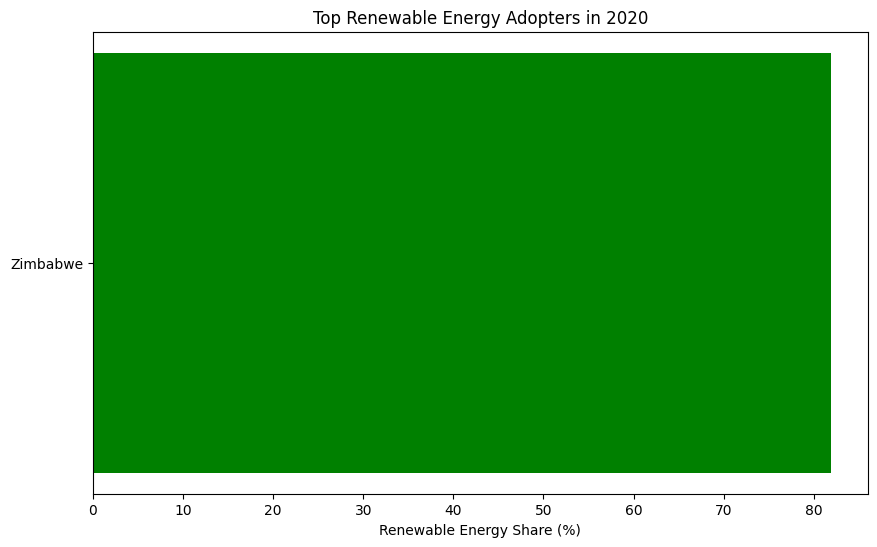

In [16]:
# Bar chart for Top Renewable Energy Adopters
plt.figure(figsize=(10,6))
plt.barh(top_renewables['Entity'], top_renewables['Renewable energy share in the total final energy consumption (%)'], color='green')
plt.xlabel('Renewable Energy Share (%)')
plt.title(f'Top Renewable Energy Adopters in {latest_year}')
plt.gca().invert_yaxis()
plt.show()


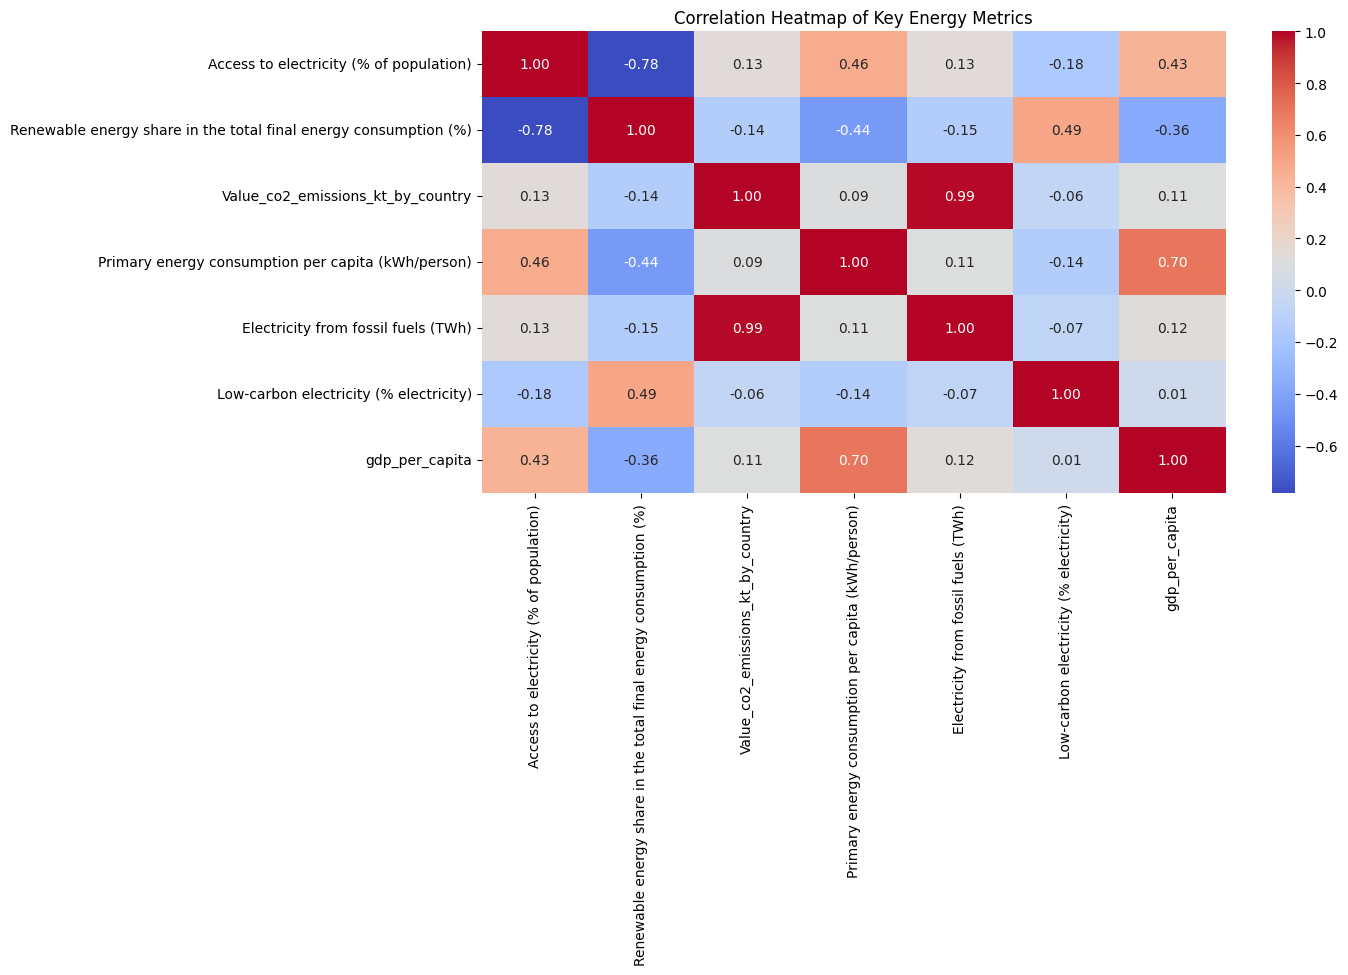

In [17]:
# -----------------------------
# Step 6: Correlation Heatmap
# -----------------------------
metrics_for_corr = [
    'Access to electricity (% of population)',
    'Renewable energy share in the total final energy consumption (%)',
    'Value_co2_emissions_kt_by_country',
    'Primary energy consumption per capita (kWh/person)',
    'Electricity from fossil fuels (TWh)',
    'Low-carbon electricity (% electricity)',
    'gdp_per_capita'
]

df_corr = data[metrics_for_corr].dropna()
corr_matrix = df_corr.corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Key Energy Metrics')
plt.show()
